# Dataset and libraries

In [1]:
# Importing the libraries and the dataset
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


In [2]:
# Getting the words actually written in the review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print([id2word.get(i, ' ') for i in X_train[6]])
print(y_train[6])
print(X_train[6])

['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'dedications', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'rocketed', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', "captain's", 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'mayfair', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', "kevin's", 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', '498', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', '

In [3]:
# summarize the dataset size

'''
From this snippet we can see that there are 50000 movie reviews in total. 25000 in the training and testing sets, respectively.
'''

print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [5]:
# Summarize number of classes

'''
There are only two unique sentiments: positive (1) and negative (0).
'''

print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


# Preprocessing the Data

In [7]:
# Summarize number of unique words

'''
There are almost 90 000 unique words in the combined dataset, i.e. all 50 000 reviews.

This is interesting. We have about 1.8 unique words per review, which is a small number. This just goes to show how much we
reuse words in a single sentence/review. 

This could also be an indication that most people's vocabularies are similar. Across 50000 reviews we only use roughly 90000 different words.
'''

print("Number of unique words: ")
print(len(np.unique(np.hstack(X))))

Number of unique words: 
88585


Review length: 
Mean 234.76 words (172.911495)


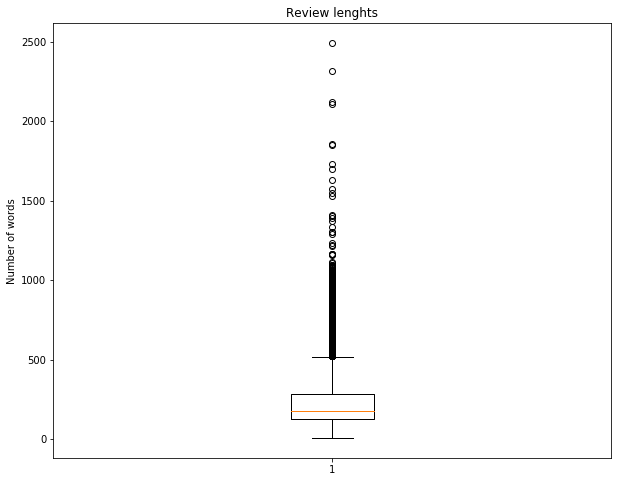

The minimum review length is 7.
The maximum review length is 2494.


In [9]:
# Summarize review length

'''
Below is a summary of the review length. We can see that an average review is about 230 words long. The maximum review 
length is just below 2500 words, with the shortest review being only 7 words.
'''

print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# plot review length
ax, fig = plt.subplots(figsize = (10, 8))
plt.boxplot(result)
plt.title("Review lenghts")
plt.ylabel("Number of words")
plt.show()

# Min and max review lengths
print(f"The minimum review length is {min(result)}.")
print(f"The maximum review length is {max(result)}.")

# Build the Model

For this RNN we will be making use of a word embedding representation for the IMDB dataset. This requires the use of an embedding layer. Keras offers this embedding layer.

In [10]:
# Importing the required modeling libraries for the Recurrent Neural Network (RNN)
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [11]:
# load the dataset but only keep the top n words, zero the rest. We set the 'vocabulary size' to 5000 words
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# We cap the number of words per review
'''
pad_sequences is used to ensure that all sequences in a list have the same length. 
By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the 
longest sequence. We will bound reviews at 500 words, truncating longer reviews and zero-padding shorter reviews.

We will also use a 50/50 split of the dataset into training and test.
'''
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [12]:
'''
We will use an Embedding layer as the input layer, setting the vocabulary to 5000. 
The word vector size is set to 32 dimensions and the input_length to 500. 
The output of this first layer will be a 32×500 sized matrix.
'''
# Creating the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words)) # Embedding layer
model.add(Flatten()) # Flatten the Embedded layers output to one dimension
model.add(Dense(250, activation='relu')) # Dense hidden layer with a relu activation function
model.add(Dense(1, activation='sigmoid')) # Output layer (one neuron) with a sigmoid activation to output values of 0 and 1 as predictions
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Logarithmic loss in used
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


# Train the Model

In [37]:
# Training the model
'''
We only use 2 epochs. The reason for this is to prevent overfitting - such RNN's have been known to overfit quickly.
There is a lot of data so we will use a batch size of 128.
'''

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 16s - loss: 0.5093 - acc: 0.7117 - val_loss: 0.3148 - val_acc: 0.8632
Epoch 2/2
 - 15s - loss: 0.1899 - acc: 0.9274 - val_loss: 0.3011 - val_acc: 0.8723


"\nWe only use 2 epochs. The reason for this is to prevent overfitting - such RNN's have been known to overfit quickly.\n"

# Test the Model

In [38]:
# Final evaluation of the model on the test set. This is where we predict the movie sentiments on an unseen set of reviews.
'''
The evaluation of the model on the test set is also shown in the above cell. The model.fit instruction performs the validation
on the test set as well.
'''

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.23%


# Summary of initial results

We confirm in the above cell that the accuracy on the test set of 25000 reviews is just over 87%. This is very good! This means that we correctly predicted roughly 22000 of the 25000 (unseen) movie review sentiments.

# Model refinement

We were able to achieve a high model accuracy with little effort. Could we improve this accuracy even further? In the section below we try to do so. Two suggested ways of doing so are:

 - Using a larger embedding
 - Adding more hidden layers

In [43]:
# Larger embedding

'''
We keep using 2 epochs and a batch size of 128. We only increase the size of the embedded layer's output.
'''

embedded_size = [64, 128, 256]

for size in embedded_size:
    # Creating the model
    model_2 = Sequential()
    model_2.add(Embedding(top_words, size, input_length=max_words)) # Embedding layer
    model_2.add(Flatten()) # Flatten the Embedded layers output to one dimension
    model_2.add(Dense(250, activation='relu')) # Dense hidden layer with a relu activation function
    model_2.add(Dense(1, activation='sigmoid')) # Output layer (one neuron) with a sigmoid activation to output values of 0 and 1 as predictions
    model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Logarithmic loss in used
    print(f"Embedded layer size: {size}")
    print(model_2.summary())

    # Training the model
    model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
    print(" ")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               8000250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 8,320,501
Trainable params: 8,320,501
Non-trainable params: 0
_________________________________________________________________
Embedded layer size: 64 None
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 31s - loss: 0.5225 - acc: 0.7053 - val_loss: 0.3041 - val_acc: 0.8703
Epoch 2/2
 - 31s - loss: 0.1895 - acc: 0.9278 - val_loss: 0.3145 - val_acc: 0.8714
 
_________________

From the above output we observe that as the embedded layer's size increases from 64 to 128 the model accuracy (on the second epoch) increases from 87.14% to 87.35%. The model performs best when this value is set to 128. The model does second best when this value is set to 32. There is therefore no clear linear relationship between the size of the embedding layer output and the model accuracy. For this exercise we conclude that using the embedding layer output dimension of 128 is most suitable. This may not always be the case - different problems will warrant different values for this parameter.  

In [56]:
# Added hidden layers

# Range of hidden dense layers that will be tested
num_of_hidden_layers = [1, 2, 3]

for num in num_of_hidden_layers:
    model_3 = Sequential()
    model_3.add(Embedding(top_words, 128, input_length=max_words)) # Embedding layer
    model_3.add(Flatten()) # Flatten the Embedded layers output to one dimension
    # Adding the required number of hidden dense layers
    for i in range(num):
        model_3.add(Dense(250, activation='relu')) # Dense hidden layer with a relu activation function
    model_3.add(Dense(1, activation='sigmoid')) # Output layer (one neuron) with a sigmoid activation to output values of 0 and 1 as predictions
    model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Logarithmic loss in used
    print(f"Number of dense layers = {num}")
    print(model_3.summary())
      
    # Training the model
    model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
    print(" ")

Number of dense layers = 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 256)          1280000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 128000)            0         
_________________________________________________________________
dense_48 (Dense)             (None, 250)               32000250  
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 251       
Total params: 33,280,501
Trainable params: 33,280,501
Non-trainable params: 0
_________________________________________________________________
None
 
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 133s - loss: 0.5124 - acc: 0.7479 - val_loss: 0.2902 - val_acc: 0.8778
Epoch 2/2
 - 138s - loss: 0.1351 - acc: 0.9513 - val_loss: 0.3321 - val_acc: 0.8659
Number of 

There are two observations that we can derive from the above output:

 - The first is that we notice how increasing the number of hidden dense layers does not necessarily lead to an improved model. In fact, on the above dataset we see that the model's accuracy actually decreases as we increase the number of hidden dense layers from 1 to 2 to 3. In addition to decreasing the model accuracy, adding more hidden dense layers also leads to longer runtimes for the models. It does therefore not make sense to have more than 1 hidden dense layer (of size 250) for this particular problem.
 
 - The second observation is that the model accuracy on the first epoch is higher than the accuracy on the second epoch. The model's accuracy on the training set improves if we run two epochs, but it reduces on the test set. This is likely an indication of overfitting. This overfitting effect becomes more pronounced as the total number of layers increases.
 
Recommendation - The model structure set out below produced the most accurate results for this problem: 

 - Layers of the model = One embedded layer, one hidden dense layer (size 250, relu activation), one output layer (sigmoid activation) 
 - Embedded layer size = 128

# Predict Something

We will use the below movie reviews and use our model to predict whether it is positive or negative. From reading the reviews I would label them as follows:

Review 1 = Negative (0);
Review 2 = Positive (1)

Review 1: 

"Terrible acting!! Too many changes from original. They took out too many important parts of the original. Showing the strength of Mufasa but also his friendly side (his friendship with Zazu, how he respects and hugs Rafiki, that he taught Simba how to pounce). Even the opening scene wasn’t the same. Why would you alter that? The huge rising sun in tune with the music that gives almost everyone goosebumps. The new one you see trees with a slightly lit up morning sky and then a small sun appears off to the side that isn’t in sync with the music. Mufasas personality doesn’t sound the same even though it’s still James Earl Jones’ voice. It’s different somehow. The hyenas are not the same. They don’t make jokes and laugh at themselves like “make mine a cub sandwich” then laugh hysterically at their own jokes. They eliminated Ed, the one who doesn’t speak, just laughs. Timon isn’t flamboyant or half as funny as the original. The hula scene in the original was fast paced and funny to distract the hyenas. The new one he slowly sings “Be our Guest”?? No action and not as fun. In fact, ALL of the new characters (including Beyoncé) sound like they are just reading from a script and it’s really mundane and forced. None of them are in character and flow like the original. There’s no sass or wit. The music is boring. It’s a huge disappointment. Rafiki catches Simbas hair and knows immediately it’s him. In the original, he knows the scent, but it takes him a minute to figure it out and when he does, he’s ecstatic. Not in the remake. There is no image of Mufasa in the clouds to guide Simba to remember who he is. Rafiki doesn’t give him a lesson about how the past can hurt with his stick. Simba doesn’t hug Rafiki like his father did which is also symbolic to how Simba is like his father. I don’t understand why Disney would eliminate these bonds and characters that we all love and change it to make what is a visually stunning movie into something I will never want to see again."


Review 2: 

To an unabashed degree, Hobbs & Shaw is a movie about wheelhouse capitalization – both in front of and behind the camera. Nobody here is exactly breaking new ground, but everyone is doing what they do best, and it’s really the film’s greatest strength. It’s always fun when you can feel a palpable confidence from a blockbuster, and this one has it flowing. Not every stylistic choice fully works (especially those that get significant set ups without big payoffs), and logic isn’t consistently the narrative’s greatest concern, but the majority of its big swings connect.

In [63]:
# Reviews to predict
predict_this_1 = "Terrible acting!! Too many changes from original. They took out too many important parts of the original. Showing the strength of Mufasa but also his friendly side (his friendship with Zazu, how he respects and hugs Rafiki, that he taught Simba how to pounce). Even the opening scene wasn’t the same. Why would you alter that? The huge rising sun in tune with the music that gives almost everyone goosebumps. The new one you see trees with a slightly lit up morning sky and then a small sun appears off to the side that isn’t in sync with the music. Mufasas personality doesn’t sound the same even though it’s still James Earl Jones’ voice. It’s different somehow. The hyenas are not the same. They don’t make jokes and laugh at themselves like “make mine a cub sandwich” then laugh hysterically at their own jokes. They eliminated Ed, the one who doesn’t speak, just laughs. Timon isn’t flamboyant or half as funny as the original. The hula scene in the original was fast paced and funny to distract the hyenas. The new one he slowly sings “Be our Guest”?? No action and not as fun. In fact, ALL of the new characters (including Beyoncé) sound like they are just reading from a script and it’s really mundane and forced. None of them are in character and flow like the original. There’s no sass or wit. The music is boring. It’s a huge disappointment. Rafiki catches Simbas hair and knows immediately it’s him. In the original, he knows the scent, but it takes him a minute to figure it out and when he does, he’s ecstatic. Not in the remake. There is no image of Mufasa in the clouds to guide Simba to remember who he is. Rafiki doesn’t give him a lesson about how the past can hurt with his stick. Simba doesn’t hug Rafiki like his father did which is also symbolic to how Simba is like his father. I don’t understand why Disney would eliminate these bonds and characters that we all love and change it to make what is a visually stunning movie into something I will never want to see again."
predict_this_2 = "To an unabashed degree, Hobbs & Shaw is a movie about wheelhouse capitalization – both in front of and behind the camera. Nobody here is exactly breaking new ground, but everyone is doing what they do best, and it’s really the film’s greatest strength. It’s always fun when you can feel a palpable confidence from a blockbuster, and this one has it flowing. Not every stylistic choice fully works (especially those that get significant set ups without big payoffs), and logic isn’t consistently the narrative’s greatest concern, but the majority of its big swings connect."

# Removing punctuation from the reviews
import string
predict_this_1 = predict_this_1.translate(str.maketrans('', '', string.punctuation))
predict_this_2 = predict_this_2.translate(str.maketrans('', '', string.punctuation))

# Splitting the new strings (without punctuation) into lists of individual words
words_1 = predict_this_1.split()
words_2 = predict_this_2.split()

# Creating lists containing the IMDB index values for the words in each of the new reviews. 
# We also only consider words in the top 5000 as was done for the earlier models.
x_test_1 = []
for w in words_1:
    if w in word2id and word2id[w]<=5000:
        x_test_1.append(word2id[w])

x_test_2 = []
for w in words_2:
    if w in word2id and word2id[w]<=5000:
        x_test_2.append(word2id[w])

# Creating a single array with both of the reviews' lists. Each entry in the array represents the indexed values for a single review
x_test = np.array([x_test_1, x_test_2])

# Padding each of the reviews to a size of 500
x_test = sequence.pad_sequences(x_test, maxlen=max_words) 

In [24]:
# Creating and training the final model that will be used to predict the new review
# Notice that we use the above recommended model with an embedded layer size of 128 and only one hidden dense layer

model_final = Sequential()
model_final.add(Embedding(top_words, 128, input_length=max_words)) # Embedding layer
model_final.add(Flatten()) # Flatten the Embedded layers output to one dimension
model_final.add(Dense(250, activation='relu')) # Dense hidden layer with a relu activation function
model_final.add(Dense(1, activation='sigmoid')) # Output layer (one neuron) with a sigmoid activation to output values of 0 and 1 as predictions
model_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Logarithmic loss in used
print(model_final.summary())

# Training the model
model_final.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               16000250  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 16,640,501
Trainable params: 16,640,501
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 65s - loss: 0.5057 - acc: 0.7402 - val_loss: 0.3054 - val_acc: 0.8690
Epoc

In [74]:
# Predicting the sentiments of each of the two movie reviews
model_final.predict_classes(x_test)

array([[0],
       [0]], dtype=int32)

From the above output we can see that both reviews are predicted to be 'Negative' by the last model we built. This can be seen by the 0's in the output array above.

This result is what I expected for the first review. I am however surprised to see that the second review is labelled as 'Negative' as well. This might simply be a matter of personal opinion. Others might also feel that review 2 is not entirely 'Positive'. It could also be simply because that's the way the model was trained, i.e. similar types of reviews in the IMDB dataset (on which the model was trained) were labelled as 'Negative', which would cause the model to see similar reviews as 'Negative'. 

It's therefore difficult to say whether or not the model is correct in the case of review 2. We would however be confident in saying that the model correctly predicted review 1's sentiment.